In [1]:
import numpy as np
import pandas as pd
import scipy 
import matplotlib.pyplot as plt
import statistics
from scipy.stats import ttest_ind
from sqlalchemy import create_engine
%matplotlib inline

postgres_user = 'dsbc_student'
postgres_pw   = '7*.8G9QH21'
postgres_host = '142.93.121.174'
postgres_port = '5432'
postgres_db   = 'kickstarterprojects'

engine = create_engine('postgresql://{}:{}@{}:{}/{}'.format(postgres_user,postgres_pw,postgres_host,postgres_port,postgres_db))


ksprojects_3DPrinting = engine.execute("SELECT category, main_category, goal,state, Round(usd_pledged) AS usd_pledged_avg FROM ksprojects WHERE category = '3D Printing' AND state = 'successful' ")
engine.dispose()

rows_ksprojects_3DPrinting = ksprojects_3DPrinting.fetchall()

In [2]:
usd_charges=[x['usd_pledged_avg'] for x in rows_ksprojects_3DPrinting]
print(usd_charges)

[27362.0, 636502.0, 413531.0, 25123.0, 16049.0, 101000.0, 3401361.0, 40314.0, 6506.0, 15535.0, 373917.0, 118924.0, 156885.0, 56103.0, 8969.0, 291.0, 2112.0, 662.0, 30313.0, 56398.0, 189815.0, 45284.0, 22549.0, 3016.0, 9035.0, 409550.0, 49586.0, 169362.0, 69837.0, 4508.0, 35287.0, 599925.0, 31013.0, 235054.0, 13602.0, 185669.0, 1422.0, 7374.0, 24417.0, 433860.0, 29797.0, 27245.0, 10087.0]


In [3]:
print ('The mean of 3D printing Successful usd pledges: {}'.format(round(statistics.mean(usd_charges))))
print ('The standard deviation of 3D printing Successful usd pledges: {}'.format(round(statistics.stdev(usd_charges))))

The mean of 3D printing Successful usd pledges: 188259
The standard deviation of 3D printing Successful usd pledges: 527938


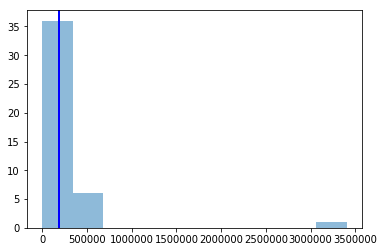

In [9]:
plt.axvline( round(statistics.mean(usd_charges)), color='b', linestyle='solid', linewidth=2)
# plt.axvline( round(statistics.mean(usd_charges)) + (round(statistics.stdev(usd_charges)), color'b', linestyle='dashed', linewidth=2)                                            )                                                                              )
# plt.axvline( round(statistics.mean(usd_charges)) - round(statistics.stdev(usd_charges)), color'b', linestyle='dashed', linewidth=2 )

plt.hist(usd_charges,alpha=0.5 ,bins=(10))
plt.show()